<div>
<img style="float:right" width="200"height="60" src="https://www.coe.int/documents/21202288/62129062/languages-COVID-19_used+by+CoE+main+portal.jpg/b9882ed7-9e7b-caf8-c6e4-9cec0f125baa?t=1585837178000">
</div>

# Covid-19 Data Analaysis

**T5 Data Science Bootcamp**

### Table of Contents

- [Introduction](#Introduction)
- [Part I - Imports](#Imports)
- [Part II - Load Data](#Load)
- [Part III - Data Formating](#Dataformating)
- [Part IV - Exploartory Data Analysis](#Exploartory)
- [Part IIV - Applaying Functions To Data ](#Functions)
- [Part V - Conclusion](#Conclusion)

## Introduction
This is the Data Science BootCamp project, which is an analysis of a data set using python and its libraries, Mathplotib, Numby, and pandas. Here, I used a data set on **Covid-19** that includes cases and deaths from the beginning of the Corona Virus outbreak.
<br> <br>

In this project, what we want is to analyze the data and figure out the number of cases and deaths over the last days and months and the time series since the onset of the virus outbreak by answering questions such as:
* What is the daily rate of infections and deaths worldwide since the outbreak of the virus?
* What is the average daily number of cases and deaths by country?
* What is the total monthly cases and deaths in the world?
* what is the total number of cases and deaths per month according to each country?
* Who are the top 5 countries in the number of deaths and cases since the beginning of the virus outbreak?
* What is the time series for the number of deaths and cases?

<br>
 Let's let the data do the talking!


<a id='Imports'></a>
# Libraries Imports

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
from datetime import date
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 10,10
rcParams['font.size'] = 15
sb.set_style('whitegrid')
sb.set_palette("pastel")

<a id='Load'></a>
# Load Data

In [3]:
corona = pd.read_csv('COVID-19-geographic-disbtribution-worldwide.csv',parse_dates=True) 

corona.head(5000)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,12/14/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,12/13/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/11/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,12/10/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8/14/2020,14,8,2020,1,0,Barbados,BB,BRB,287021.0,America,11.845823
4996,8/13/2020,13,8,2020,0,0,Barbados,BB,BRB,287021.0,America,11.497417
4997,8/12/2020,12,8,2020,0,0,Barbados,BB,BRB,287021.0,America,11.497417
4998,8/11/2020,11,8,2020,1,0,Barbados,BB,BRB,287021.0,America,11.497417


<a id='Dataformating'></a>
# Data Formating

In [4]:
corona.drop(['dateRep','geoId','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000','continentExp','countryterritoryCode'],axis=1,inplace=True)
corona.head()

,day,month,year,cases,deaths,countriesAndTerritories,popData2019
0,14,12,2020,746,6,Afghanistan,38041757.0
1,13,12,2020,298,9,Afghanistan,38041757.0
2,12,12,2020,113,11,Afghanistan,38041757.0
3,11,12,2020,63,10,Afghanistan,38041757.0
4,10,12,2020,202,16,Afghanistan,38041757.0


In [5]:
corona.isna().any()

day                        False
month                      False
year                       False
cases                      False
deaths                     False
countriesAndTerritories    False
popData2019                 True
dtype: bool

In [6]:
corona['popData2019'].fillna(0,inplace=True)
corona.isna().any()

day                        False
month                      False
year                       False
cases                      False
deaths                     False
countriesAndTerritories    False
popData2019                False
dtype: bool

In [7]:
corona['popData2019'] = (corona['popData2019']/float(1000000)).round(2)
corona.sample(5)

,day,month,year,cases,deaths,countriesAndTerritories,popData2019
21860,19,1,2020,0,0,Georgia,4.00
8613,5,12,2020,0,0,Brunei_Darussalam,0.43
31139,17,4,2020,9,1,Kenya,52.57
50932,1,4,2020,3,0,Sint_Maarten,0.04
7905,25,6,2020,0,0,Botswana,2.30


In [8]:
corona.rename({'popData2019':'Population',
               'countriesAndTerritories':'Countries'},
                   axis=1, inplace=True)
corona.head(5000)

,day,month,year,cases,deaths,Countries,Population
0,14,12,2020,746,6,Afghanistan,38.04
1,13,12,2020,298,9,Afghanistan,38.04
2,12,12,2020,113,11,Afghanistan,38.04
3,11,12,2020,63,10,Afghanistan,38.04
4,10,12,2020,202,16,Afghanistan,38.04
...,...,...,...,...,...,...,...
4995,14,8,2020,1,0,Barbados,0.29
4996,13,8,2020,0,0,Barbados,0.29
4997,12,8,2020,0,0,Barbados,0.29
4998,11,8,2020,1,0,Barbados,0.29


In [9]:
def drop_zero_days(data,country):
    df = data[data['Countries'] == country].reset_index(drop=True)
    first_infected_day = df[df['cases'] != 0 ].tail(1).index[0]
    result = df.drop(df.index[first_infected_day+1:])
    return result

def concatenate_countries_dfs(dfs):
    df = DataFrame()
    for d in dfs :
        df = pd.concat([df,d],ignore_index=True)
    return df
countries = corona['Countries'].unique()

corona_dfs_list = []

for country in countries:
    df = drop_zero_days(corona, country)
    if len(df) != 0:
        corona_dfs_list.append(df)

In [10]:
corona_updated = concatenate_countries_dfs(corona_dfs_list)
corona_updated

,day,month,year,cases,deaths,Countries,Population
0,14,12,2020,746,6,Afghanistan,38.04
1,13,12,2020,298,9,Afghanistan,38.04
2,12,12,2020,113,11,Afghanistan,38.04
3,11,12,2020,63,10,Afghanistan,38.04
4,10,12,2020,202,16,Afghanistan,38.04
...,...,...,...,...,...,...,...
58925,25,3,2020,0,0,Zimbabwe,14.65
58926,24,3,2020,0,1,Zimbabwe,14.65
58927,23,3,2020,0,0,Zimbabwe,14.65
58928,22,3,2020,1,0,Zimbabwe,14.65


<a id='Exploartory'></a>
## Exploartory Data Analysis

In [11]:
corona_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58930 entries, 0 to 58929
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   day         58930 non-null  int64  
 1   month       58930 non-null  int64  
 2   year        58930 non-null  int64  
 3   cases       58930 non-null  int64  
 4   deaths      58930 non-null  int64  
 5   Countries   58930 non-null  object 
 6   Population  58930 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 3.1+ MB


In [12]:
corona_updated.describe()

,day,month,year,cases,deaths,Population
count,58930.000000,58930.000000,58930.000000,58930.000000,58930.000000,58930.000000
mean,15.665501,7.343238,2019.999983,1213.365247,27.368624,40.263251
std,8.847848,2.728845,0.004119,6942.874344,134.359625,153.169129
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,0.000000
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.150000
50%,15.000000,7.000000,2020.000000,21.000000,0.000000,7.040000
75%,23.000000,10.000000,2020.000000,311.000000,5.000000,28.520000
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1433.780000


In [13]:
corona_updated[corona_updated['cases'].eq(float(-8261))]

,day,month,year,cases,deaths,Countries,Population
16055,7,9,2020,-8261,3800,Ecuador,17.37


In [14]:
corona_updated[corona_updated['cases'] == 234633]

,day,month,year,cases,deaths,Countries,Population
56078,12,12,2020,234633,3343,United_States_of_America,329.06


In [15]:
corona_updated[corona_updated['deaths'].eq(float(-1918))]

,day,month,year,cases,deaths,Countries,Population
50246,25,5,2020,-372,-1918,Spain,46.94


In [16]:
corona_updated[corona_updated['deaths'] == 4928]

,day,month,year,cases,deaths,Countries,Population
56318,16,4,2020,30148,4928,United_States_of_America,329.06


In [17]:
corona_updated['Countries'].value_counts()

China                                         350
Mexico                                        336
Japan                                         335
Thailand                                      330
South_Korea                                   330
                                             ... 
Solomon_Islands                                60
Wallis_and_Futuna                              59
Marshall_Islands                               47
Vanuatu                                        34
Cases_on_an_international_conveyance_Japan     28
Name: Countries, Length: 214, dtype: int64

In [18]:
corona_updated.corr()

,day,month,year,cases,deaths,Population
day,1.000000,-0.140265,-0.007140,-0.004863,-0.007636,-0.002430
month,-0.140265,1.000000,-0.007030,0.114242,0.055301,-0.047093
year,-0.007140,-0.007030,1.000000,0.000704,0.000839,-0.037478
cases,-0.004863,0.114242,0.000704,1.000000,0.743121,0.316704
deaths,-0.007636,0.055301,0.000839,0.743121,1.000000,0.280837
Population,-0.002430,-0.047093,-0.037478,0.316704,0.280837,1.000000


<a id='Functions'></a>
## Applying Functions to Data

In [19]:
d1 = date(2020,12,25)
d2 = date(2019,12,1)
corona_days = (d1-d2).days

corona_gloabl_deaths_avg = corona_updated['deaths'].sum() / corona_days
corona_gloabl_cases_avg = corona_updated['cases'].sum() / corona_days
print(corona_gloabl_deaths_avg,corona_gloabl_cases_avg)

4135.469230769231 183342.6


What is the daily rate of infections and deaths worldwide since the outbreak of the virus?

<BarContainer object of 2 artists>

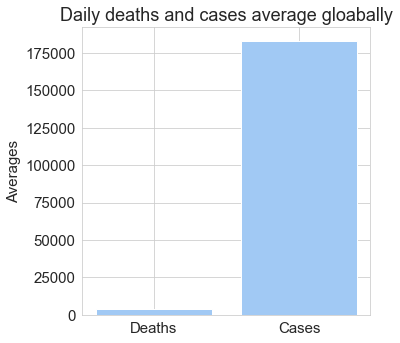

In [20]:
x = ['Deaths','Cases']
y = [corona_gloabl_deaths_avg,corona_gloabl_cases_avg]

fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([.1,.1,1,1])

ax.set_ylabel('Averages')
ax.set_title('Daily deaths and cases average gloabally')

ax.bar(x,y)

What is the average daily number of cases and deaths by country?

<AxesSubplot:xlabel='Countries'>

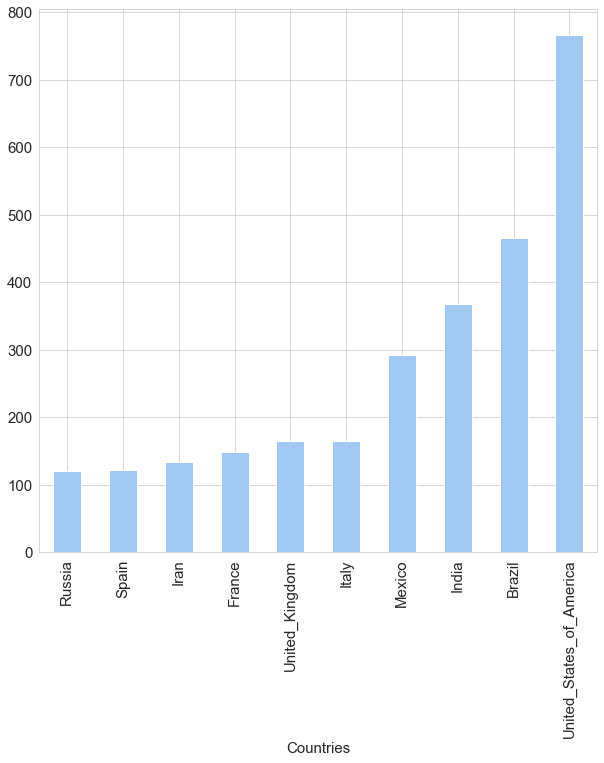

In [21]:
avg_by_country = corona_updated.groupby('Countries')[['deaths','cases']].agg([sum]).sort_values(by=('deaths','sum'))
avg_by_country = avg_by_country / corona_days
avg_by_country
avg_by_country['deaths']['sum'].tail(10).plot(kind='bar')

<AxesSubplot:xlabel='Countries'>

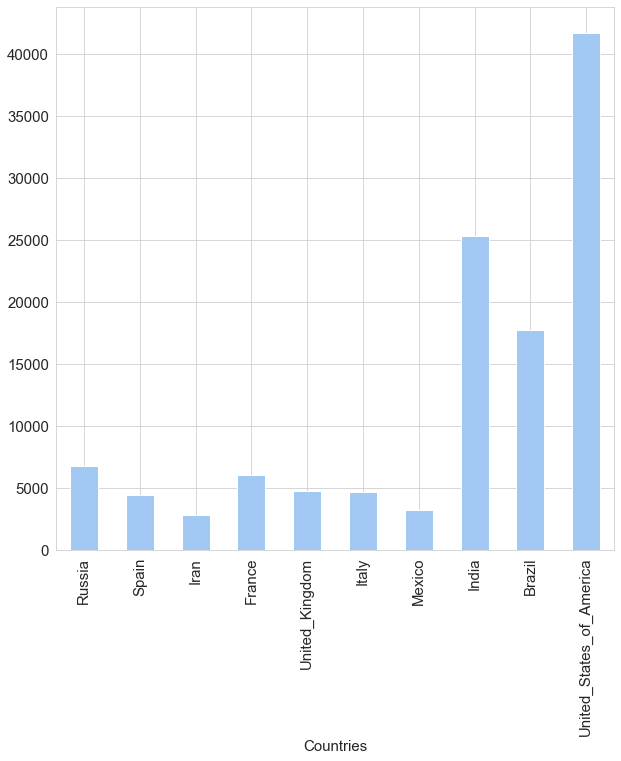

In [22]:
avg_by_country['cases']['sum'].tail(10).plot(kind='bar')

What is the total monthly cases and deaths in the world?

In [23]:
sum_by_month = corona_updated.groupby('month')[['deaths','cases']].agg([sum]).sort_values(by=('deaths','sum'))
sum_by_month 

,deaths,cases
,sum,sum
month,,
1,213,9799
2,2708,75422
3,35814,723738
6,134069,4249525
5,140142,2891996
12,151585,8642865
9,162169,8456248
7,166195,7067524


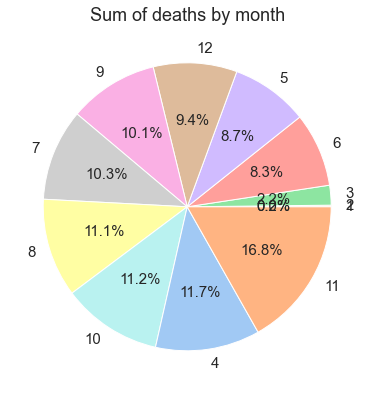

In [24]:
x = sum_by_month.index.tolist()
y = sum_by_month['deaths']['sum']

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([.1,.1,1,1])

ax.set_title('Sum of deaths by month')
ax.set_yticklabels(x)

ax.pie(y,labels=x,autopct='%1.1f%%');

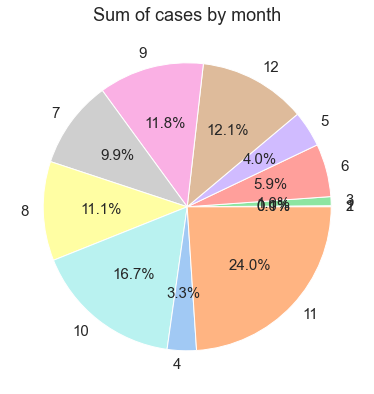

In [25]:
x = sum_by_month.index.tolist()
y = sum_by_month['cases']['sum']

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([.1,.1,1,1])

ax.set_title('Sum of cases by month')
ax.set_yticklabels(x)

ax.pie(y,labels=x,autopct='%1.1f%%');

what is the total number of cases and deaths per month according to each country?

In [26]:
sum_by_month_country = corona_updated.groupby(['Countries','month'])[['deaths','cases']].agg([sum]).sort_index()

In [27]:
sum_by_month_country.loc[['Iran','Italy']]

deaths   cases
                   sum     sum
Countries month               
Iran      2         34     388
          3       2723   41107
          4       3200   52162
          5       1777   55293
          6       2936   76255
          7       5899   76325
          8       4893   72040
          9       4524   80067
          10      8492  151315
          11     13397  343797
          12      4321  159520
Italy     1          0       3
          2         21     885
          3      11570  100851
          4      16091  101852
          5       5658   29073
          6       1404    7772
          7        388    6722
          8        345   21060
          9        398   44793
          10      2446  334663
          11     16583  937504
          12      9616  258534

Who are the top 5 countries in the number of deaths and cases since the beginning of the virus outbreak?

In [28]:
corona_by_country = corona_updated.groupby('Countries')
deaths_by_country_sum = corona_by_country['deaths'].sum()

In [29]:
deaths_by_country_sum = deaths_by_country_sum.sort_values(ascending=False).head(5)

<BarContainer object of 5 artists>

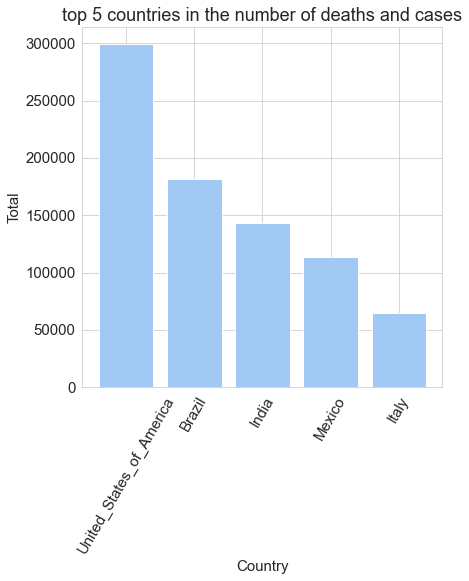

In [30]:
x = deaths_by_country_sum.index.tolist()
y = deaths_by_country_sum

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([.1,.1,1,1])

ax.set_xlabel('Country')
ax.set_ylabel('Total')
ax.set_title('top 5 countries in the number of deaths and cases')
ax.set_xticklabels(x,rotation=60,horizontalalignment='center')

ax.bar(x,y)

#### What is the time series for the number of deaths and Cases?

In [49]:
def time_series_by_country(country):
    corona_by_day_ser = corona[corona['Countries']==country].sort_values(by=['year','month','day']).reset_index(drop=True)
    x = corona_by_day_ser.index
    y = corona_by_day_ser[['deaths','cases']]

    max_deaths_v = y['deaths'].max()
    max_deaths_i = corona_by_day_ser['deaths'].idxmax()

    max_cases_v =  y['cases'].max()
    max_cases_i = corona_by_day_ser['cases'].idxmax()

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([.1,.1,1,1])
    ax.set_xlabel('Over time')
    ax.set_ylabel('Total of Deaths & Cases')
    ax.set_title('Sum of global deaths & cases over the time')
    ax.set_xticklabels(' ')
    ax.annotate('Max Deaths \n {} deaths'.format(max_deaths_v),xy=(max_deaths_i,max_deaths_v),xytext=( int(max_deaths_i)+5  ,int(max_deaths_v) + 50),
               arrowprops=dict(facecolor='red',shrink=0.05))

    ax.annotate('Max Cases \n {} cases'.format(max_cases_v) ,xy=(max_cases_i,max_cases_v),xytext=( int(max_cases_i)+5  ,int(max_cases_v) + 50),
               arrowprops=dict(facecolor='red',shrink=0.05))
    ax.plot(x,y)

In [50]:
corona_by_day_ser = corona[corona['Countries']==country].sort_values(by=['year','month','day']).reset_index(drop=True) #.sort_values(by=['Deaths']).reset_index(drop=True)
x = corona_by_day_ser.index
y = corona_by_day_ser[['deaths','cases']]

In [51]:
max_deaths_v = y['deaths'].max()
max_deaths_i = corona_by_day_ser['deaths'].idxmax()

max_cases_v =  y['cases'].max()
max_cases_i = corona_by_day_ser['cases'].idxmax()

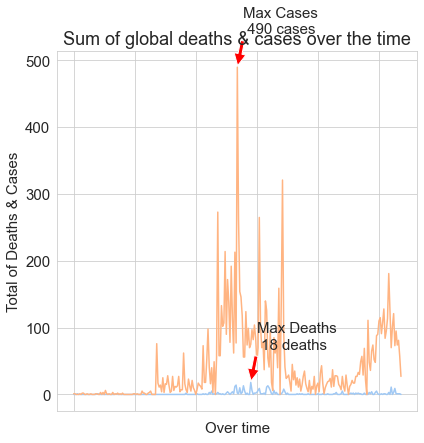

In [52]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([.1,.1,1,1])

ax.set_xlabel('Over time')
ax.set_ylabel('Total of Deaths & Cases')
ax.set_title('Sum of global deaths & cases over the time')
ax.set_xticklabels(' ')
ax.annotate('Max Deaths \n {} deaths'.format(max_deaths_v),xy=(max_deaths_i,max_deaths_v),xytext=( int(max_deaths_i)+5  ,int(max_deaths_v) + 50),
               arrowprops=dict(facecolor='red',shrink=0.05))

ax.annotate('Max Cases \n {} cases'.format(max_cases_v) ,xy=(max_cases_i,max_cases_v),xytext=( int(max_cases_i)+5  ,int(max_cases_v) + 50),
               arrowprops=dict(facecolor='red',shrink=0.05))

ax.plot(x,y)


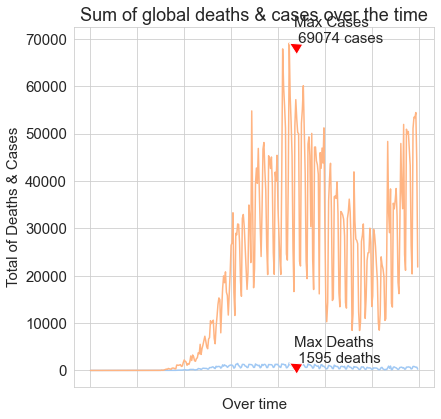

In [53]:
time_series_by_country('Brazil')

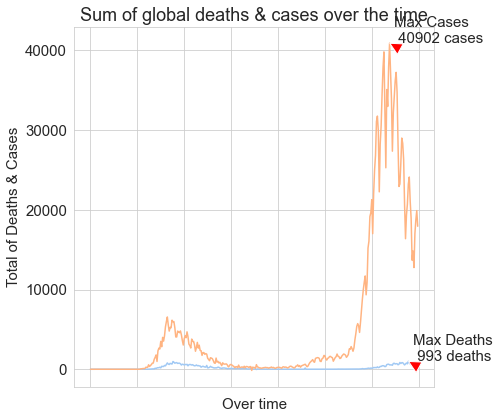

In [54]:
time_series_by_country('Italy')

<a id='Conclusion'></a>
## Conclusion

The above results have shown us the records of cases and deaths by country and chronology since the onset of the virus outbreak. The data set will be used to predict Corona's future impacts on working life, business and so forth.
<b><b>